In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

In [2]:
model_dir = r"model5"


my_model = tf.keras.models.load_model(
    model_dir,
    custom_objects=None,
    compile=True
)

In [3]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

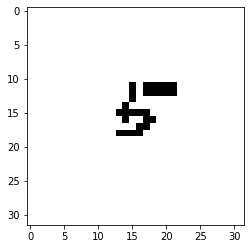

array([[9.86446619e-01, 1.23726055e-02, 6.06384845e-07, 1.35028007e-04,
        1.28445754e-06, 9.48827392e-07, 1.05297140e-05, 6.67795131e-04,
        7.37274240e-05, 2.90969270e-04]], dtype=float32)

In [50]:
my_model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

testImage = r"test\5\52.png"

img = image.load_img(testImage, target_size =(32, 32), color_mode='grayscale')

import matplotlib.pyplot as plt

plt.imshow(img, cmap='Greys')
plt.show()


array = image.img_to_array(img)
x = np.expand_dims(array, axis=0)

vimage = np.vstack([x])
my_model.predict(vimage)

#tam gdzie wpisze 1 to ta kategoria miala najwieksza zgodnosc

In [75]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = r"test" #sciezka do pliku z zdjeciami do testow
test_gen = test_datagen.flow_from_directory(test_dir, 
                                                target_size=(32, 32), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="categorical",color_mode="grayscale")

Found 60 images belonging to 10 classes.


In [76]:
result = my_model.evaluate(test_gen)
print(result)

2/2 [==============================] - 1s 318ms/step - loss: 2.3034 - accuracy: 0.1000
[2.30340576171875, 0.10000000149011612]
